In [1]:
import numpy as np
import pylab as pl
import random
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Problem 1: Gillespies algorithm

In [11]:
def sir_event(initial,time, params): 
    """We asumme inital conditions as integers and X,Y,Z ordered"""
    gamma, beta, mu = params[0], params[1], params[2]
    rates = np.zeros(6)
    N = sum(initial)
    initial = np.array(initial)
    rates[0] = mu*N  #Birth
    #Handling d
    if initial[0]!= 0 and initial[1] != 0:
        rates[1] = beta*initial[0]*initial[1]/N
    elif:
        rates[1] = 0
    rates[1] = beta*initial[0]*initial[1]/N #Tranmission
    rates[2] = gamma*initial[1] #
    rates[3] = mu*initial[0]
    rates[4] = mu*initial[1]
    rates[5] = mu*initial[2]
    changes = np.array([[1,0,0],[-1, 1, 0], [0,-1, 1], [-1, 0, 0], [0, -1, 0], [0, 0 ,-1]])
    dtm = []
    for rate in rates:
        if rate == 0:
            dtm.append('inf')
        else:
            dtm.append(-np.log(np.random.rand())/rate)
    indx = np.argmin(dtm)
    dt = dtm[indx]
    event = np.array([initial + changes[indx]]).T
    return event, time + dt


def event_loop(tmax, initial, function, arguments):
    '''Keeps loop for '''
    time = [0]
    results = np.array([[value] for value in initial])
    while time[-1] < tmax:
        event, tn = function(initial, time[-1], arguments)
        results = np.concatenate((results, event), axis= 1)
        initial = event[:,0]
        time.append(tn)
    time = np.array(time)
    return time, results

C:\Users\Aleks\AppData\Local\Temp\ipykernel_26904\1271069091.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  dtm = [-np.log(np.random.rand())/rate for rate in rates]


(0.0, 30.0)

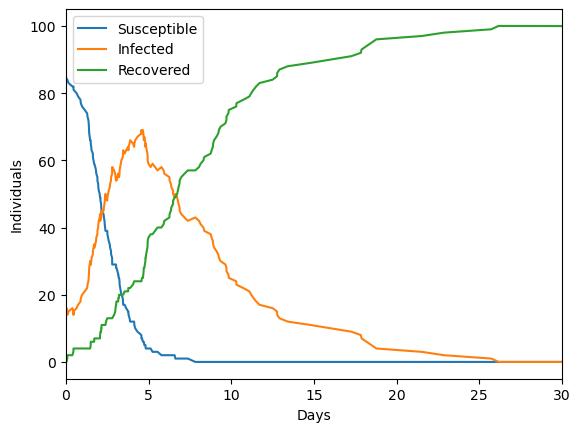

In [12]:
p =  [0.15, 1.5, 1/(365*60)]
N = 100

populations = np.round(100* np.array([0.85, 0.15, 0]))
x, y = event_loop(30, populations, sir_event,p )

# print(y[0;])
plt.plot(x, y[0,:], label = 'Susceptible')
plt.plot(x, y[1,:], label = 'Infected')
plt.plot(x, y[2,:], label = 'Recovered')

plt.xlabel('Days')
plt.ylabel('Individuals')
plt.legend()
plt.xlim(0, 30)


In [ ]:
t= np.diff(x)
# print(t)
plt.hist(t[t < 0.5])

## Investigating simulation variability

## Simulation variability and negative covariance

In [ ]:
# We first define the deterministic SIR model
initial_values = [S0, I0, R0]

def SIR(initial, t, gamma, beta, mu):   
    Y = np.zeros(3) 
    Y[0] = mu - beta * initial[0] * initial[1] - mu * initial[0]
    Y[1] = beta * initial[0] * initial[1] - gamma * initial[1] - mu * initial[1]
    Y[2] = gamma * initial[1] - mu * initial[2]
    return Y   


First we run both deterministic and stochastic models for different R0's many times

In [ ]:
#Setting model parameters
betas = np.linspace(1.5,100, 5)
gamma = 0.15
mu = 1/60*365
reproductive = betas/(mu+gamma)

# Seeting population size 
N = 100
populations = np.round(100* np.array([0.85, 0.15, 0]))
tmax = 50

# Setting time array for deterministic model
time = np.arange(0,tmax+1,1)

# First run stochastic model for different R0s for 10 times 
stoch_runs = {}
det_run = {}

# Outer loop which varies the beta we apply to both models
for indx, r0 in enumerate(reproductive) :
    print(f"Current R0: {r0}")
    temp = []
    beta = betas[indx]
    # Running stochastic model many times with same beta
    for k in range(5):
        print(f"k = {k}")
        params = [gamma, beta, mu]
        tn, y = event_loop(tmax, populations, sir_event,params)
        temp.append([tn, y])
    #Saving stochastic results
    stoch_runs[r0] = temp
    print('Running deterministic model now')
    #Running and saving deterministic output
    det_output = odeint(SIR, populations, time, args = (gamma, beta, mu))
    det_run[r0] = [time, det_output]
    

## Stochastic resonance and Increased transients

## Extinction events and critial community size

In [ ]:
# Define loop where we stop  when infection reaches extinction
def event_loop2(initial, function, arguments):
    '''Keeps loop for '''
    time = [0]
    results = np.array([[value] for value in initial])
    k = 0 
    while True:
        event, tn = function(initial, time[-1], arguments)
        results = np.concatenate((results, event), axis= 1)
        initial = event[:,0]
        time.append(tn)
        if event[1][0] == 0:
            break
    time = np.array(time)
    return time, results

### Effect of population size N

In [ ]:
# Run montecarlo simulation with one N and collect values --> Calculate median value per N value
beta = 1.5
gamma = 0.15
mu = 1/(60*365)
np.random.seed(69)

# Running loop for different Ns
Ns = np.logspace(1, 4, 6)
end_times = []

for j in range(len(Ns)):
    N = Ns[j]
    I0 = int(N * (0.25))
    S0 = int(N * 0.75)
    R0 = int(N * 0)
    initial = [S0, I0, R0]
    t = [] 
    print(f"Current N: {N}")
    for k in range(5):
#         print(f"Current k: {k}")
        initial = [S0, I0, R0]
        params = [gamma, beta, mu]
        times, results = event_loop2(initial, sir_event,params)
        t.append(times[-1])
    avg_time = np.average(t)
    end_times.append(avg_time)
    
plt.scatter(Ns, end_times)
plt.plot(Ns, end_times)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Population Size N')
plt.ylabel('Average extinction time')
# Run simulation for differnt N's , Run multiple times and compile all the final times

### Effect of R0

In [ ]:
# Setting random number seed
np.random.seed(69)

# Run montecarlo simulation with one N and collect values --> Calculate median value per N value
gamma = 0.15
mu = 1/(60*365)
betas = np.arange(gamma,3,0.3)

N = 100
I0 = int(N * (0.25))
S0 = int(N * 0.75)
R0 = int(N * 0)

Rp = betas/(gamma + mu)
end_times = []
for j in range(len(Rp)):
    beta = betas[j]
    print(Rp[j])
    params = [gamma, beta, mu]
    t = [] 
    for k in range(10):
        times, results = event_loop2(initial, sir_event,params)
        t.append(times[-1])
    avg_time = np.average(t)
    end_times.append(avg_time)
    
plt.scatter(Rp, end_times)
plt.plot(Rp, end_times)
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$R_0$')
plt.ylabel('Average extinction time')

In [ ]:
plt.scatter(Rp, end_times)
plt.plot(Rp, end_times)
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel(r'$R_0$')
plt.ylabel('Average extinction time')

# Problem 2: Spatial models - Networks

In [ ]:
import networkx as nx
import ndlib
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc


## Implementing SIR on different networks: Barabasi Albert, Watts-Strogatz, Erdos-Reyni

In [ ]:
# Creating graphs
# n = 100
# m = 0.1
# seed = 69

# 'Scale free' network
barabasi = nx.barabasi_albert_graph(n, m, seed)
# erdos = nx.erdos_renyi_graph(n, p, seed=None, directed=False)

# 'Small world' network
# watts = nx.watts_strogatz_graph(n, k, p, seed=None) 

# # Model selection
# model1 = ep.SIRModel(erdos)

# # Model Configuration
# cfg = mc.Configuration()
# cfg.add_model_parameter('beta', 1.5)
# cfg.add_model_parameter('gamma', 0.5)
# cfg.add_model_parameter("fraction_infected", 0.05)
# model1.set_initial_status(cfg)

# models

In [ ]:
# 1.Load diffent network types, 
# 2.For each network type do three runs with different R0
# 3


In [ ]:
print(1/7)

## Generating equivalent networks

## Simulating SIR spread through networks

## Real data: Applying dynamic Vaccination strategy 

### Steps:
1.Load graph data
2.Instantiate sIR model into graph
3.


In [ ]:
test = nx.barabasi_albert_graph(5, 1, 3)

dic = test.degree()
print(dic)
# G.degree[0]

In [ ]:
print(-np.log(0))
x = np.linspace

In [15]:
print(np.argmin(['-inf', 2 ,3 ]))

0


In [16]:
0.3/0.00000000001

30000000000.0